In [4]:
from bloc.BlocServer import BlocServer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
bs = BlocServer()

In [39]:
records = pd.read_sql_table('sprecord', con=bs.conn)
events = pd.read_sql_table('spevent', con=bs.conn)
markets = pd.read_sql_table('spmarket', con=bs.conn)
records.tail()

,recordid,source,marketid,runnerid,timestamputc,handicap,odds,stake,islay,isplaced,notes
121464,121465,betfair,15,22812152,2019-08-11 01:11:14.416559,0.0,1.30,20.29,True,False,
121465,121466,betfair,15,22812152,2019-08-11 01:11:14.416559,0.0,110.00,9.51,True,False,
121466,121467,betfair,15,12739925,2019-08-11 01:11:14.416559,0.0,1.03,27.87,False,False,
121467,121468,betfair,15,12739925,2019-08-11 01:11:14.416559,0.0,1.02,17.73,False,False,
121468,121469,betfair,15,12739925,2019-08-11 01:11:14.416559,0.0,1.01,906.21,False,False,


In [24]:
#records['ts'] = records['timestamputc'].apply(lambda x: x.timestamp())

In [27]:
markets

,marketid,eventid,markettype,runners,marketparameters,notes
0,1,1,WINNING_MARGIN,"{'7369468': 'Collingwood under 24.5pts', '7369...",{'source': {'betfair': {'marketid': '1.1595171...,
1,2,1,MATCH_ODDS,"{'217709': 'Collingwood', '39981': 'Richmond'}",{'source': {'betfair': {'marketid': '1.1595171...,
2,3,2,HANDICAP,"{'4513766': 'Gold Coast', '39977': 'Essendon'}",{'source': {'betfair': {'marketid': '1.1595196...,
3,4,2,MATCH_ODDS,"{'4513766': 'Gold Coast', '39977': 'Essendon'}",{'source': {'betfair': {'marketid': '1.1595196...,
4,5,3,MATCH_ODDS,"{'39979': 'Hawthorn', '42153': 'Brisbane'}",{'source': {'betfair': {'marketid': '1.1595174...,
5,6,3,HANDICAP,"{'39979': 'Hawthorn', '42153': 'Brisbane'}",{'source': {'betfair': {'marketid': '1.1595174...,
6,7,4,MATCH_ODDS,"{'217710': 'Port Adelaide Power', '5304641': '...",{'source': {'betfair': {'marketid': '1.1595184...,
7,8,5,MATCH_ODDS,"{'7337': 'Sri Lanka', '7659': 'Bangladesh'}",{'source': {'betfair': {'marketid': '1.1607779...,
8,9,6,MATCH_ODDS,"{'7797904': 'Lucas Miedler', '2283676': 'Carlo...",{'source': {'betfair': {'marketid': '1.1607889...,
9,10,7,MATCH_ODDS,"{'39980': 'Carlton', '39991': 'West Coast'}",{'source': {'betfair': {'marketid': '1.1595228...,


In [28]:
# Select a particular market
r = records.loc[(records.marketid==14) & (records.runnerid==39990) &  (records.handicap ==0)]

'''BBO = r.groupby(['timestamputc', 'marketid', 'handicap', 'runnerid', 'isplaced', 'islay'])['odds'].agg(['min','max'])

# Unstack multi-index
BBO = pd.DataFrame(BBO.to_records())
# Get best bids/offers
bestBids = BBO.loc[(~BBO.isplaced) & (~BBO.islay)  , ['timestamputc', 'max']].rename(columns = {'max': 'odds'})
bestAsks = BBO.loc[(~BBO.isplaced) & BBO.islay , ['timestamputc', 'min']].rename(columns={'min': 'odds'})


#marketBids = r.loc[~r.isplaced & ~r.islay]
#marketAsks = r.loc[~r.isplaced & r.islay]
myBids = r.loc[r.isplaced & ~r.islay]
myAsks = r.loc[r.isplaced & r.islay]
'''
r.tail()


,recordid,source,marketid,runnerid,timestamputc,handicap,odds,stake,islay,isplaced,notes
120281,120281,betfair,14,39990,2019-08-11 00:55:57.883041,0.0,1.500,272.340000,False,False,
120288,120288,betfair,14,39990,2019-08-11 00:55:58.278791,0.0,1.522,3.267974,False,True,"{""botName"": ""marketmaker"", ""botParams"": {""spre..."
120289,120289,betfair,14,39990,2019-08-11 00:55:58.278791,0.0,1.538,3.267974,True,True,"{""botName"": ""marketmaker"", ""botParams"": {""spre..."
120290,120290,betfair,14,39990,2019-08-11 00:55:58.342103,0.0,1.522,3.267974,False,True,"{""botName"": ""marketmaker"", ""botParams"": {""spre..."
120291,120291,betfair,14,39990,2019-08-11 00:55:58.342103,0.0,1.538,3.267974,True,True,"{""botName"": ""marketmaker"", ""botParams"": {""spre..."


In [29]:
# Pivot odds/stake for this market. Get best bid/offer and sum stake
z = r.loc[:, ['timestamputc', 'odds', 'stake', 'islay', 'isplaced']].pivot_table(
    index='timestamputc', columns=['islay','isplaced'], values=['odds','stake'],
    aggfunc={'odds':['min','max'], 'stake':'sum'})
z.head()

odds                                         \
                             max                       min                
islay                      False        True         False        True    
isplaced                   False  True  False  True  False  True  False   
timestamputc                                                              
2019-08-11 00:47:32.921232  1.53    NaN  1.56    NaN  1.51    NaN  1.54   
2019-08-11 00:47:49.008276  1.52    NaN  1.56    NaN  1.50    NaN  1.54   
2019-08-11 00:47:49.418123   NaN  1.522   NaN  1.538   NaN  1.522   NaN   
2019-08-11 00:47:49.483770   NaN  1.522   NaN  1.538   NaN  1.522   NaN   
2019-08-11 00:48:01.556183  1.52    NaN  1.56    NaN  1.50    NaN  1.54   

                                     stake                               
                                       sum                               
islay                                False              True             
isplaced                    True     False     True     False     True   
timestamputc                                                             
2019-08-11 00:47:32.921232    NaN  1459.19       NaN  2088.51       NaN  
2019-08-11 00:47:49.008276    NaN  1980.39       NaN  2116.83       NaN  
2019-08-11 00:47:49.418123  1.538      NaN  3.267974      NaN  3.267974  
2019-08-11 00:47:49.483770  1.538      NaN  3.267974      NaN  3.267974  
2019-08-11 00:48:01.556183    NaN  1980.39       NaN  2116.83       NaN

In [30]:
#z.loc[:, ['bestBid', 'bestAsk', 'myBid', 'myAsk', 'myBidStake', 'myAskStake']] = z.iloc[:, [0, 6, 1, 7, 9, 11]]
z1 = z.iloc[:, [0, 6, 1, 7, 9, 11]] # more robust way to select 
z1.columns = ['bestBid', 'bestAsk', 'myBid', 'myAsk', 'myBidStake', 'myAskStake']
z1.head()

,bestBid,bestAsk,myBid,myAsk,myBidStake,myAskStake
timestamputc,,,,,,
2019-08-11 00:47:32.921232,1.53,1.54,NaN,NaN,NaN,NaN
2019-08-11 00:47:49.008276,1.52,1.54,NaN,NaN,NaN,NaN
2019-08-11 00:47:49.418123,NaN,NaN,1.522,1.538,3.267974,3.267974
2019-08-11 00:47:49.483770,NaN,NaN,1.522,1.538,3.267974,3.267974
2019-08-11 00:48:01.556183,1.52,1.54,NaN,NaN,NaN,NaN


In [31]:
z1[['nextBid', 'nextAsk']] = z1.loc[:, ['bestBid', 'bestAsk']].fillna(method= 'bfill')
z1[['prevBid', 'prevAsk']] = z1.loc[:, ['bestBid', 'bestAsk']].fillna(method= 'ffill')
z1['prevMid'] = z1[['prevBid', 'prevAsk']].mean(axis=1)
z1.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,bestBid,bestAsk,myBid,myAsk,myBidStake,myAskStake,nextBid,nextAsk,prevBid,prevAsk,prevMid
timestamputc,,,,,,,,,,,
2019-08-11 00:47:32.921232,1.53,1.54,NaN,NaN,NaN,NaN,1.53,1.54,1.53,1.54,1.535
2019-08-11 00:47:49.008276,1.52,1.54,NaN,NaN,NaN,NaN,1.52,1.54,1.52,1.54,1.530
2019-08-11 00:47:49.418123,NaN,NaN,1.522,1.538,3.267974,3.267974,1.52,1.54,1.52,1.54,1.530
2019-08-11 00:47:49.483770,NaN,NaN,1.522,1.538,3.267974,3.267974,1.52,1.54,1.52,1.54,1.530
2019-08-11 00:48:01.556183,1.52,1.54,NaN,NaN,NaN,NaN,1.52,1.54,1.52,1.54,1.530


In [32]:
'''# Reconstruct myBid/myAsk
spreadTightener = 0.1
z1['myBid'] = z1.loc[:, 'prevBid'] + (z1.loc[:,'prevAsk'] - z1.loc[:,'prevBid'])*spreadTightener
z1['myAsk'] = z1.loc[:, 'prevAsk'] - (z1.loc[:,'prevAsk'] - z1.loc[:,'prevBid'])*spreadTightener
z1.head()
'''

"# Reconstruct myBid/myAsk\nspreadTightener = 0.1\nz1['myBid'] = z1.loc[:, 'prevBid'] + (z1.loc[:,'prevAsk'] - z1.loc[:,'prevBid'])*spreadTightener\nz1['myAsk'] = z1.loc[:, 'prevAsk'] - (z1.loc[:,'prevAsk'] - z1.loc[:,'prevBid'])*spreadTightener\nz1.head()\n"

In [33]:
# Bid is hit if next ask is below. Ask it hit if next bid is above 
z1['isHitBid'] =  (z1.nextAsk < z1.myBid) * (z1.prevBid < z1.prevAsk)
z1['isHitAsk'] =  (z1.nextBid > z1.myAsk) * (z1.prevBid < z1.prevAsk)
 
outcome = 1
    
z1.loc[:,'bidPL'] = (outcome-z1.myBid)*z1.myBidStake  * z1.isHitBid

z1.loc[:,'askPL'] = (z1.myAsk - outcome)*z1.myAskStake * z1.isHitAsk

z1.loc[z1.isHitBid | z1.isHitAsk,:].tail(20)

,bestBid,bestAsk,myBid,myAsk,myBidStake,myAskStake,nextBid,nextAsk,prevBid,prevAsk,prevMid,isHitBid,isHitAsk,bidPL,askPL
timestamputc,,,,,,,,,,,,,,,


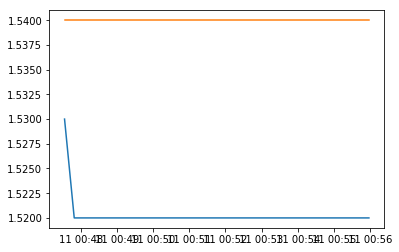

In [34]:
plt.plot(z1.loc[:,['prevBid', 'prevAsk']])


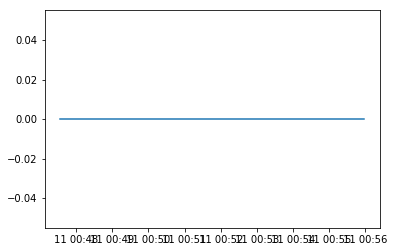

In [35]:
plt.plot(z1.index, np.nancumsum(z1.bidPL +z1.askPL))

In [36]:
'''
# This is done better by the pivot table
# Check if orders are hit before the next tick (wildly slow)
for recordInd, record in myBids.iterrows():
    nextInd = bestAsks.loc[(bestAsks.timestamputc>record.timestamputc), 'timestamputc'].idxmin()
    # Bid is hit if next ask is less than current placed bid
    myBids.loc[recordInd, 'isHit'] = (bestAsks.loc[nextInd, 'odds']< record.odds)
    
for recordInd, record in myAsks.iterrows():
    nextInd = bestBids.loc[(bestBids.timestamputc>record.timestamputc), 'timestamputc'].idxmin()
    # Bid is hit if next ask is less than current placed bid
    myAsks.loc[recordInd, 'isHit'] = (bestBids.loc[nextInd, 'odds']> record.odds)
'''

"\n# This is done better by the pivot table\n# Check if orders are hit before the next tick (wildly slow)\nfor recordInd, record in myBids.iterrows():\n    nextInd = bestAsks.loc[(bestAsks.timestamputc>record.timestamputc), 'timestamputc'].idxmin()\n    # Bid is hit if next ask is less than current placed bid\n    myBids.loc[recordInd, 'isHit'] = (bestAsks.loc[nextInd, 'odds']< record.odds)\n    \nfor recordInd, record in myAsks.iterrows():\n    nextInd = bestBids.loc[(bestBids.timestamputc>record.timestamputc), 'timestamputc'].idxmin()\n    # Bid is hit if next ask is less than current placed bid\n    myAsks.loc[recordInd, 'isHit'] = (bestBids.loc[nextInd, 'odds']> record.odds)\n"

In [37]:
events.head()

,eventid,sport,competition,event,starttimestamputc
0,1,Australian Rules,AFL,"{'id': '29182435', 'name': 'Collingwood v Rich...",2019-07-25 23:50:00
1,2,Australian Rules,AFL,"{'id': '29182438', 'name': 'Gold Coast v Essen...",2019-07-27 20:40:00
2,3,Australian Rules,AFL,"{'id': '29182386', 'name': 'Hawthorn v Brisban...",2019-07-26 17:45:00
3,4,Australian Rules,AFL,"{'id': '29182389', 'name': 'Port Adelaide v GW...",2019-07-26 23:40:00
4,5,Cricket,One Day Internationals,"{'id': '29384544', 'name': 'Sri Lanka v Bangla...",2019-07-27 23:00:00


In [38]:
events['event'].apply(lambda x: x['name'])

0                          Collingwood v Richmond
1                           Gold Coast v Essendon
2                             Hawthorn v Brisbane
3                             Port Adelaide v GWS
4                Sri Lanka v Bangladesh (2nd ODI)
5                               Miedler v Berlocq
6                            Carlton v West Coast
7     North Queensland Cowboys v Brisbane Broncos
8                           Brisbane v Gold Coast
9                         Monfils v Bautista Agut
10                           St Kilda v Fremantle
11              Groenefeld/Schuurs v Dabrowski/Xu
Name: event, dtype: object

In [17]:
markets.marketparameters[7]['source']['betfair']['marketid']

'1.160777929'

In [142]:
set(records.runnerid)

{7337,
 7659,
 22832,
 39977,
 39979,
 39980,
 39991,
 42153,
 217710,
 2283676,
 4513766,
 5304641,
 7797904,
 9279689}

In [160]:
# Determine hits
# Bid hit if the NEXT ask is lower
# Ask hit if the NEXT bid is higher